# Pandas 데이터 가공
- crosstab()
- pivot_table()
- get_dummies()
- stack()/unstack()
- melt()
- 텍스트데이터 가공
- 그룹연산
- 통계함수

# crosstab()

crosstab은 판다스의 데이터프레임에서 교차표를 생성하는 기능을 제공하는 함수입니다.  
교차표는 두 변수 사이의 빈도, 빈도 비율 등을 보여주는 표로서,  
특히 범주형(명목형 norminal, 순서형 ordinal) 데이터에 유용하게 활용됩니다.

crosstab 함수의 구문:

```python
pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
```

- `index`: 교차표의 행 인덱스를 지정하는데 사용되는 열(또는 열 이름)입니다.
- `columns`: 교차표의 열 인덱스를 지정하는데 사용되는 열(또는 열 이름)입니다.
- `values`: 교차표의 데이터로 사용할 열(또는 열 이름)을 선택적으로 지정합니다. 기본값은 None이며, 이 경우 빈도가 계산됩니다.
- `rownames`: 행 인덱스에 사용할 이름을 지정합니다.
- `colnames`: 열 인덱스에 사용할 이름을 지정합니다.
- `aggfunc`: 교차표 셀에 적용할 집계 함수를 지정합니다. 기본값은 None이며, 이 경우 빈도가 계산됩니다.
- `margins`: 부분 합계를 생성할지 여부를 지정하는데, 기본값은 False입니다.
- `margins_name`: 부분 합계의 이름을 지정합니다.
- `dropna`: 결측값이 포함된 행/열을 제거할지 여부를 지정하는데, 기본값은 True입니다.
- `normalize`: 빈도를 빈도 비율로 정규화할지 여부를 지정하는데, 기본값은 False입니다.

In [2]:
import pandas as pd

data = {
    'Student': ["Alice", "Bob", "Charlie", "Alice", "Bob", "David", "Charlie", "Alice", "Alice", "Bob"],
    'Movie': ['Star Wars', 'Batman', 'Star Wars', 'Harry Potter', 'Batman', 'Star Wars', 'Harry Potter', 'Sixty Seconds', 'Batman', 'Star Wars'],
    'Rating': [5, 4, 3, 4, 5, 2, 3, 4, 1, 3]
}

df = pd.DataFrame(data)
df

,Student,Movie,Rating
0,Alice,Star Wars,5
1,Bob,Batman,4
2,Charlie,Star Wars,3
3,Alice,Harry Potter,4
4,Bob,Batman,5
5,David,Star Wars,2
6,Charlie,Harry Potter,3
7,Alice,Sixty Seconds,4
8,Alice,Batman,1
9,Bob,Star Wars,3


In [3]:
pd.crosstab(df.Student, df.Movie)

Movie,Batman,Harry Potter,Sixty Seconds,Star Wars
Student,,,,
Alice,1,1,1,1
Bob,2,0,0,1
Charlie,0,1,0,1
David,0,0,0,1


In [4]:
import numpy as np
pd.crosstab(df.Student, df.Movie, values=df.Rating, aggfunc=np.mean)

Movie,Batman,Harry Potter,Sixty Seconds,Star Wars
Student,,,,
Alice,1.0,4.0,4.0,5.0
Bob,4.5,NaN,NaN,3.0
Charlie,NaN,3.0,NaN,3.0
David,NaN,NaN,NaN,2.0


In [8]:
import numpy as np
pd.crosstab(df.Student, df.Movie, values=df.Rating, aggfunc='mean')

Movie,Batman,Harry Potter,Sixty Seconds,Star Wars
Student,,,,
Alice,1.0,4.0,4.0,5.0
Bob,4.5,NaN,NaN,3.0
Charlie,NaN,3.0,NaN,3.0
David,NaN,NaN,NaN,2.0


In [9]:
pd.crosstab(df.Student, df.Movie, values=df.Rating, aggfunc=np.mean, margins=True)

Movie,Batman,Harry Potter,Sixty Seconds,Star Wars,All
Student,,,,,
Alice,1.000000,4.0,4.0,5.00,3.5
Bob,4.500000,NaN,NaN,3.00,4.0
Charlie,NaN,3.0,NaN,3.00,3.0
David,NaN,NaN,NaN,2.00,2.0
All,3.333333,3.5,4.0,3.25,3.4


In [10]:
pd.crosstab(df.Student, df.Movie, normalize=True)

Movie,Batman,Harry Potter,Sixty Seconds,Star Wars
Student,,,,
Alice,0.1,0.1,0.1,0.1
Bob,0.2,0.0,0.0,0.1
Charlie,0.0,0.1,0.0,0.1
David,0.0,0.0,0.0,0.1


<Axes: xlabel='Movie', ylabel='Student'>

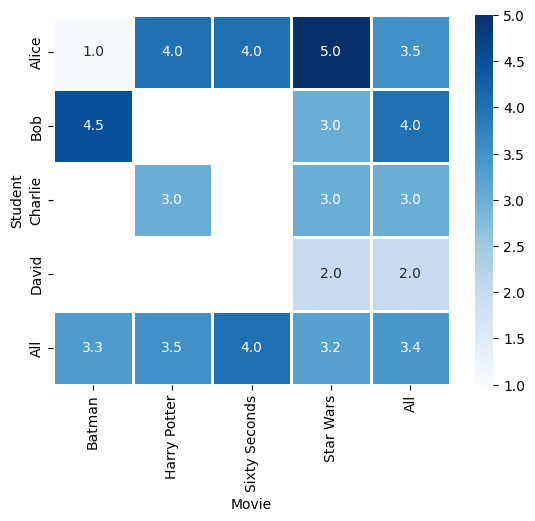

In [20]:
import seaborn as sns

sns.heatmap(
    pd.crosstab(df.Student, df.Movie, values=df.Rating, aggfunc=np.mean, margins=True),
    annot=True, # 수치 표시 여부
    fmt=".1f", # 수치 표시할때 포멧 (소숫점 1자리까지 표시)
    cmap="Blues", # 수치에 따른 color를 표시하는 방법
    linewidth=2,
)

# pivot_table()

pivot_table은 판다스의 데이터프레임에서 데이터를 `재구조화`하고 `집계 연산`을 수행하는 기능을 제공하는 메서드입니다.  
pivot_table 메서드를 사용하면 데이터프레임의 `행`과 `열`을 `재배치`하여 `새로운 데이터프레임`을 생성하며,   
`중복된 조합`에 대해 `집계 함수`를 적용하여 결과를 생성할 수 있습니다.

pivot_table 메서드의 구문:

```python
DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
```

- `values`: 집계하고자 하는 열의 이름(들). 기본값은 None이며, 모든 열에 대해 집계함수가 적용됩니다. 수치형 데이터이어야 합니다.
- `index`: 행 인덱스로 사용할 열의 이름(들). 주로 명목형 데이터형입니다.
- `columns`: 열 인덱스로 사용할 열의 이름(들).
- `aggfunc`: 집계 함수를 지정합니다. 기본값은 'mean'으로 평균을 의미합니다. 다른 자주 사용되는 함수로 'sum', 'count', 'min', 'max' 등이 있습니다.
fill_value: 결측값 대체를 위한 값.
- `margins`: 부분 합계를 생성할지 여부를 지정하는데, 기본값은 False입니다.
- `dropna`: 결측값이 포함된 행/열을 제거할지 여부를 지정하는데, 기본값은 True입니다.
- `margins_name`: 부분 합계의 이름을 지정합니다.


In [21]:
import pandas as pd
import numpy as np

# 데이터 생성
data = {
    'Date': ['2023-08-01', '2023-08-01', '2023-08-02', '2023-08-02', '2023-08-03', '2023-08-03'],
    'City': ['Seoul', 'Busan', 'Seoul', 'Busan', 'Seoul', 'Busan'],
    'Temperature': [32, 28, 30, 27, 33, 29],
    'Humidity': [50, 60, 55, 58, 45, 62]
}

df = pd.DataFrame(data)
df

,Date,City,Temperature,Humidity
0,2023-08-01,Seoul,32,50
1,2023-08-01,Busan,28,60
2,2023-08-02,Seoul,30,55
3,2023-08-02,Busan,27,58
4,2023-08-03,Seoul,33,45
5,2023-08-03,Busan,29,62


In [22]:
# pivot을 사용하여 데이터프레임 재구조화 
df.pivot_table(index='Date', values=['Temperature'], aggfunc='mean')

,Temperature
Date,
2023-08-01,30.0
2023-08-02,28.5
2023-08-03,31.0


In [23]:
# pivot을 사용하여 데이터프레임 재구조화 
df.pivot_table(index='City', values='Humidity', aggfunc=['max', 'min'])

,max,min
,Humidity,Humidity
City,,
Busan,62,58
Seoul,55,45


In [24]:
# 다수의 column 활용 (날짜기준)
df.pivot_table(index='Date', values=['Temperature', 'Humidity'], aggfunc='mean')

,Humidity,Temperature
Date,,
2023-08-01,55.0,30.0
2023-08-02,56.5,28.5
2023-08-03,53.5,31.0


In [25]:
# 다수의 index, column 활용 
df.pivot_table(index=['City', 'Date'], values=['Temperature', 'Humidity'], aggfunc='mean')

Humidity  Temperature
City  Date                             
Busan 2023-08-01        60           28
      2023-08-02        58           27
      2023-08-03        62           29
Seoul 2023-08-01        50           32
      2023-08-02        55           30
      2023-08-03        45           33

In [26]:
# agg_func 추가
df.pivot_table(index='City',  values=['Temperature'], aggfunc=[np.mean, 'count', 'std', 'min', 'max', lambda x: x.max()-x.min()])

,mean,count,std,min,max,<lambda>
,Temperature,Temperature,Temperature,Temperature,Temperature,Temperature
City,,,,,,
Busan,28.000000,3,1.000000,27,29,2
Seoul,31.666667,3,1.527525,30,33,3


# get_dummies()

get_dummies는 판다스의 데이터프레임에서 `범주형 변수`를  
`더미 변수`(0 또는 1로 이루어진 이진 변수)로 변환하는 기능을 제공하는 함수입니다.  
범주형 변수를 더미 변수로 변환하여 기계 학습 모델에 적용하거나 데이터 분석에 활용하는 데 유용합니다.

get_dummies 함수의 구문:

```python
pd.get_dummies(data, prefix=None, prefix_sep='_', columns=None, drop_first=False, dtype=None)
```

- **data**: 더미 변수로 변환할 데이터프레임이나 시리즈를 지정합니다.
- **prefix**: 더미 변수의 컬럼 이름에 추가할 접두어를 지정합니다.
- **prefix_sep**: 접두어와 변수 이름 사이에 추가할 구분 기호를 지정합니다.
- **columns**: 더미 변수로 변환할 열(또는 열 이름)을 선택적으로 지정합니다. 기본값은 None이며, 이 경우 모든 열이 더미 변수로 변환됩니다.
- **drop_first**: 더미 변수 중 첫 번째 변수를 제거할지 여부를 지정합니다. 기본값은 False이며, True로 설정하면 첫 번째 더미 변수가 제거됩니다.
- **dtype**: 생성된 더미 변수의 데이터 타입을 지정합니다.


In [27]:
import pandas as pd

# 학생 성적 데이터 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Ella'],
    'Subject': ['Math', 'Science', 'Math', 'English', 'Science'],
    'Grade': ['A', 'B', 'B', 'C', 'A']
}

df = pd.DataFrame(data)
df


,Name,Subject,Grade
0,Alice,Math,A
1,Bob,Science,B
2,Charlie,Math,B
3,David,English,C
4,Ella,Science,A


In [28]:
pd.get_dummies(df, columns=['Grade'])

,Name,Subject,Grade_A,Grade_B,Grade_C
0,Alice,Math,True,False,False
1,Bob,Science,False,True,False
2,Charlie,Math,False,True,False
3,David,English,False,False,True
4,Ella,Science,True,False,False


In [29]:
pd.get_dummies(df, columns=['Grade'], drop_first=True)

,Name,Subject,Grade_B,Grade_C
0,Alice,Math,False,False
1,Bob,Science,True,False
2,Charlie,Math,True,False
3,David,English,False,True
4,Ella,Science,False,False


In [30]:
pd.get_dummies(df, columns=['Grade'], prefix=["G"])

,Name,Subject,G_A,G_B,G_C
0,Alice,Math,True,False,False
1,Bob,Science,False,True,False
2,Charlie,Math,False,True,False
3,David,English,False,False,True
4,Ella,Science,True,False,False


In [31]:
pd.get_dummies(df, columns=['Subject', 'Grade'])

,Name,Subject_English,Subject_Math,Subject_Science,Grade_A,Grade_B,Grade_C
0,Alice,False,True,False,True,False,False
1,Bob,False,False,True,False,True,False
2,Charlie,False,True,False,False,True,False
3,David,True,False,False,False,False,True
4,Ella,False,False,True,True,False,False


# stack()/unstack()

`stack()`과 `unstack()`은 데이터프레임의 인덱스와 컬럼을 변환하는 데 사용되는 판다스 메서드입니다.  
둘 다 데이터프레임의 구조를 변경하는데 사용되지만, 
`stack()`은 차원을 축소하고 `unstack()`은 차원을 증가시킵니다.

**stack() 메서드:**

stack() 메서드는 데이터프레임의 `컬럼`을 `인덱스의 레벨`로 `"압축"`하여 Series로 변환합니다.  
컬럼을 인덱스로 변환하므로, 데이터프레임의 `차원이 축소`됩니다.  
일반적으로 `MultiIndex`가 있는 데이터프레임에서 사용됩니다.  


**unstack() 메서드:**

unstack() 메서드는 `MultiIndex`로 구성된 인덱스의 레벨을 `컬럼`으로 `"펼쳐서"` 데이터프레임으로 변환합니다.  
`인덱스`를 `컬럼`으로 변환하므로, 데이터프레임의 `차원이 증가`합니다.  
stack()과 반대로, 데이터프레임의 MultiIndex를 해제할 때 사용됩니다.  
  


In [32]:
import pandas as pd

# 다중 인덱스 생성 예제
data = {
    'Year': [2019, 2019, 2020, 2020, 2021, 2021],
    'Quarter': [1, 2, 1, 2, 1, 2],
    'Profit': [20, 25, 22, 28, 24, 30],
    'Revenue': [100, 120, 110, 130, 120, 140],
}

df = pd.DataFrame(data)
df.set_index(['Year', 'Quarter'], inplace=True)
df

Profit  Revenue
Year Quarter                 
2019 1            20      100
     2            25      120
2020 1            22      110
     2            28      130
2021 1            24      120
     2            30      140

In [33]:
df.stack()

Year  Quarter         
2019  1        Profit      20
               Revenue    100
      2        Profit      25
               Revenue    120
2020  1        Profit      22
               Revenue    110
      2        Profit      28
               Revenue    130
2021  1        Profit      24
               Revenue    120
      2        Profit      30
               Revenue    140
dtype: int64

In [34]:
type(df.stack())

pandas.core.series.Series

In [35]:
df.stack().index

MultiIndex([(2019, 1,  'Profit'),
            (2019, 1, 'Revenue'),
            (2019, 2,  'Profit'),
            (2019, 2, 'Revenue'),
            (2020, 1,  'Profit'),
            (2020, 1, 'Revenue'),
            (2020, 2,  'Profit'),
            (2020, 2, 'Revenue'),
            (2021, 1,  'Profit'),
            (2021, 1, 'Revenue'),
            (2021, 2,  'Profit'),
            (2021, 2, 'Revenue')],
           names=['Year', 'Quarter', None])

In [36]:
s = df.stack()

In [37]:
s

Year  Quarter         
2019  1        Profit      20
               Revenue    100
      2        Profit      25
               Revenue    120
2020  1        Profit      22
               Revenue    110
      2        Profit      28
               Revenue    130
2021  1        Profit      24
               Revenue    120
      2        Profit      30
               Revenue    140
dtype: int64

In [38]:
s.unstack()

Profit  Revenue
Year Quarter                 
2019 1            20      100
     2            25      120
2020 1            22      110
     2            28      130
2021 1            24      120
     2            30      140

In [ ]:
# unstack() 예제
s = df.stack()
s.unstack()

# stack()과 unstack() 메소드는 포함된 인덱스 레벨의 순서를 내부적으로 정렬하므로, stack(), unstack() 을 통함 결과가 원래의 순서와 같지 않을 수 있습니다.

In [39]:
s.unstack().unstack()

Profit     Revenue     
Quarter      1   2       1    2
Year                           
2019        20  25     100  120
2020        22  28     110  130
2021        24  30     120  140

# melt()

`melt()`는 데이터프레임의 `컬럼들`을 `정리`하여   
`'긴 형식(long format)'`으로 변환하는 기능을 제공하는 판다스 메서드입니다.   
이를 통해 데이터프레임의 `컬럼`들을 `유지`하면서  
특정 컬럼들을 행으로 '녹여내어' 새로운 데이터프레임을 생성합니다.

melt() 메서드는 주로 데이터베이스의 `'정규화(normalization)'` 개념과 관련이 있습니다.  
원래 `넓은 형식(wide format)`으로 되어있는 데이터프레임을 정리하여  
`긴 형식`으로 변환하는 작업을 수행합니다.  
melt() 메서드의 기본적인 사용 방법은 다음과 같습니다:

```python
pd.melt(
    df, id_vars=['고정 컬럼1', '고정 컬럼2', ...], 
    value_vars=['녹여낼 컬럼1', '녹여낼 컬럼2', ...], 
    var_name='새로운 열 이름', 
    value_name='새로운 값 이름'
)
```

- `df`: 대상 데이터프레임
- `id_vars`: 유지할 컬럼들의 리스트. 이 컬럼들은 기존 데이터프레임에 그대로 남아있습니다.
- `value_vars`: 녹여낼 컬럼들의 리스트. 이 컬럼들의 값들이 '녹여내어' 새로운 열과 값을 형성합니다.
- `var_name`: '녹여낸 컬럼들'을 나타내는 열의 이름을 지정합니다.
- `value_name`: '녹여낸 컬럼들'에 해당하는 값들을 나타내는 열의 이름을 지정합니다.


In [40]:
import pandas as pd

# 원본 데이터프레임 생성 예제
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Math': [90, 85, 78],
    'Science': [85, 92, 80],
    'English': [80, 88, 75],
}

df = pd.DataFrame(data)
df


,Name,Math,Science,English
0,Alice,90,85,80
1,Bob,85,92,88
2,Charlie,78,80,75


In [41]:
pd.melt(df, id_vars='Name', value_vars=['Math', 'Science', 'English'], var_name='Subject', value_name='Score')

,Name,Subject,Score
0,Alice,Math,90
1,Bob,Math,85
2,Charlie,Math,78
3,Alice,Science,85
4,Bob,Science,92
5,Charlie,Science,80
6,Alice,English,80
7,Bob,English,88
8,Charlie,English,75


In [42]:
df2 = pd.melt(df, id_vars='Name', value_vars=['Math', 'Science', 'English'], var_name='Subject', value_name='Score')
df2.pivot_table(index="Name", columns="Subject", values="Score")

Subject,English,Math,Science
Name,,,
Alice,80,90,85
Bob,88,85,92
Charlie,75,78,80


# 텍스트데이터 가공하기

데이터프레임의 `텍스트 데이터 가공`은 데이터프레임의 `텍스트 컬럼`에 대해  
문자열을 `조작`, `변환`하거나 특정 패턴을 `검색`하여 원하는 정보를 추출하는 작업을 의미합니다.  
텍스트 데이터 가공은 데이터 정제, 특정 정보 추출, 문자열 매칭, 토큰화(tokenization) 등  
다양한 용도로 사용될 수 있습니다.  
판다스에서는 데이터프레임의 텍스트 데이터 가공을 위해 다양한 메서드와 함수를 제공합니다.

텍스트 데이터 가공에 사용되는 판다스 메서드와 함수:
| 함수명 | 설명 |
|--|--|
|str.contains()| 특정 문자열이 컬럼의 각 요소에 포함되어 있는지 여부를 검사합니다.|
|str.startswith() 및  str.endswith()| 특정 문자열이 컬럼의 각 요소에 포함되어 있는지 여부를 검사합니다.|
|str.replace()| 문자열에서 특정 패턴을 찾아 다른 문자열로 치환합니다.|
|str.split()| 문자열을 지정된 구분자(delimiter)를 기준으로 분할하여 리스트로 반환합니다.|
|str.extract()| 정규표현식을 사용하여 문자열에서 특정 패턴을 추출합니다.|
|str.len()| 문자열의 길이를 계산합니다.|
|str.lower() 및 str.upper()| 문자열을 소문자 또는 대문자로 변환합니다.|
|str.strip(), str.lstrip(), str.rstrip()| 문자열의 앞뒤 공백을 제거합니다.|
|str.join()| 문자열 리스트를 지정된 구분자로 결합합니다.|
|str.cat()| 문자열 시리즈들을 결합하여 새로운 문자열 시리즈를 생성합니다.|
|str.contains()| 특정 문자열이 컬럼의 각 요소에 포함되어 있는지 여부를 검사합니다.|
|str.extract()| 문자열에서 정규표현식을 사용하여 특정 패턴을 추출합니다.|
|str.findall()| 문자열에서 정규표현식을 사용하여 특정 패턴에 매칭되는 모든 부분 문자열을 리스트로 반환합니다.|



In [43]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Description': ['Student at XYZ University', 'Employee at ABC Corp', 'Manager at DEF Inc']
}

df = pd.DataFrame(data)
df

,Name,Description
0,Alice,Student at XYZ University
1,Bob,Employee at ABC Corp
2,Charlie,Manager at DEF Inc


In [44]:
# 'Description' 컬럼에서 'Student'를 포함하는 행 선택
df[df.Description.str.contains('Student')]

,Name,Description
0,Alice,Student at XYZ University


In [45]:
# 'Description' 컬럼에서 role을 추출하여'Role' 컬럼 생성
df['Role'] = df['Description'].str.split(' at ').str[0].str.strip()
df

,Name,Description,Role
0,Alice,Student at XYZ University,Student
1,Bob,Employee at ABC Corp,Employee
2,Charlie,Manager at DEF Inc,Manager


# 그룹연산


데이터프레임의 그룹연산(GroupBy operation)은 데이터를 그룹으로 분할하여 각 그룹에 대해 특정 연산을 수행하는 기능을 말합니다.  
이를 통해 데이터를 특정 기준에 따라 그룹화하고, 그룹별로 집계, 변환, 필터링 등의 연산을 수행할 수 있습니다.

그룹연산의 주요 단계:

- `분할(Divide)`: 데이터를 기준에 따라 여러 그룹으로 분할합니다.
- `적용(Apply)`: 각 그룹에 대해 원하는 연산을 적용합니다.
- `결합(Combine)`: 연산 결과를 하나의 데이터로 결합하여 최종 결과를 생성합니다.

그룹연산에 사용되는 기능:

|이름|설명|
|--|--|
|groupby()| 데이터를 그룹으로 분할하기 위해 사용하는 메서드입니다.|
|agg()| 그룹연산에 대한 집계(aggregation) 함수를 적용할 때 사용합니다.|
|transform()| 각 그룹에 대해 변환(transform) 연산을 수행할 때 사용합니다.|
|filter()| 그룹을 필터링하여 특정 조건을 만족하는 그룹만 선택할 때 사용합니다.|

In [46]:
import pandas as pd

# 예제 데이터 생성
data = {
    'School': ["SW", "SW", "GM", "GM", "KP", "KP"],
    'Subject': ['Math', 'Science', 'Math', 'Science', 'Math', 'English'],
    'Students': [45, 30, 47, 28, 41, 70],
    'Score': [90, 85, 78, 92, 87, 80],
}

df = pd.DataFrame(data)
df.set_index("School", inplace=True)
df

,Subject,Students,Score
School,,,
SW,Math,45,90
SW,Science,30,85
GM,Math,47,78
GM,Science,28,92
KP,Math,41,87
KP,English,70,80


In [47]:
df.groupby('Subject')["Score"].mean()

Subject
English    80.0
Math       85.0
Science    88.5
Name: Score, dtype: float64

In [52]:
type(df.groupby('Subject')["Score"].mean())

pandas.core.series.Series

In [49]:
for subject, group in df.groupby("Subject"):
    print(subject)
    print(group)

English
        Subject  Students  Score
School                          
KP      English        70     80
Math
       Subject  Students  Score
School                         
SW        Math        45     90
GM        Math        47     78
KP        Math        41     87
Science
        Subject  Students  Score
School                          
SW      Science        30     85
GM      Science        28     92


In [51]:
for subject, group in df.groupby("Subject"):
    print(subject)
    # print(type(group))
    print(group["Score"].mean())
    

English
80.0
Math
85.0
Science
88.5


In [54]:
item = dict()
for subject, group in df.groupby("Subject"):
    # print(subject)
    # # print(type(group))
    # print(group["Score"].mean())
    item[subject] = group["Score"].mean()

pd.Series(item)

English    80.0
Math       85.0
Science    88.5
dtype: float64

In [ ]:
# school 별로 Score의 평균 구하기
df.groupby(df.index)["Score"].mean()

## agg() 활용
agg() 메서드는 그룹화된 데이터에 대해 원하는 집계(aggregation) 함수를 적용하여 그룹별로 요약된 결과를 얻을 수 있습니다. 

| 이름 | 기능 |
|--|--|
|mean()| 평균을 계산합니다.|
|sum()| 합계를 계산합니다.|
|min()| 최소값을 찾습니다.|
|max()| 최대값을 찾습니다.|
|count()| 데이터의 개수를 세어줍니다.|
|median()| 중앙값을 계산합니다.|
|std()| 표준편차를 계산합니다.|
|var()| 분산을 계산합니다.|
|quantile(q)| q-분위수를 계산합니다. (0 <= q <= 1)|


In [55]:
import pandas as pd

# 예제 데이터 생성
data = {
    'School': ["SW", "SW", "GM", "GM", "KP", "KP"],
    'Subject': ['Math', 'Science', 'Math', 'Science', 'Math', 'English'],
    'Students': [45, 30, 47, 28, 41, 70],
    'Score': [90, 85, 78, 92, 87, 80],
}

df = pd.DataFrame(data)
df.set_index("School", inplace=True)
df

,Subject,Students,Score
School,,,
SW,Math,45,90
SW,Science,30,85
GM,Math,47,78
GM,Science,28,92
KP,Math,41,87
KP,English,70,80


In [56]:
# 'Subject'로 그룹화하여 각 과목의 평균, 표준편차,, 최댓값을 계산
df.groupby('Subject')["Score"].agg(['mean', 'std', 'max'])

,mean,std,max
Subject,,,
English,80.0,NaN,80
Math,85.0,6.244998,90
Science,88.5,4.949747,92


In [57]:
# 'Subject'로 그룹화하여 각 과목의 평균, 표준편차,, 최댓값을 계산
df.groupby('Subject')["Score"].agg(
    Average='mean', 
    Stddev='std', 
    Max='max'
).round(1)


,Average,Stddev,Max
Subject,,,
English,80.0,NaN,80
Math,85.0,6.2,90
Science,88.5,4.9,92


In [58]:
# 'Subject'로 그룹화하여 각 과목의 평균, 표준편차, 최대-최소차이
df.groupby('Subject').agg(
    Avgerage=('Score', 'mean'),
    Stddev=('Score','std'),
    Range=('Score',lambda x: x.max()-x.min())
)

,Avgerage,Stddev,Range
Subject,,,
English,80.0,NaN,0
Math,85.0,6.244998,12
Science,88.5,4.949747,7


In [59]:
# 'Subject'로 그룹화하여 필드별로 집계함수를 다르게 지정할 경우
df.groupby('Subject').agg(
    Avgerage=('Score', 'mean'),
    Stddev=('Score','std'),
    Range=('Score',lambda x: x.max()-x.min()),
    Average_Students=('Students', 'mean')
)

,Avgerage,Stddev,Range,Average_Students
Subject,,,,
English,80.0,NaN,0,70.000000
Math,85.0,6.244998,12,44.333333
Science,88.5,4.949747,7,29.000000


## filter()

groupby()의 `filter()`는 `그룹별`로 `조건`을 적용하여 `원하는 그룹`만 `선택`하는 메서드입니다.  
filter()를 사용하면 그룹화된 데이터프레임에서 특정 조건을 만족하는 그룹만 추출할 수 있습니다.

In [60]:
import pandas as pd

# 예제 데이터 생성
data = {
    'Subject': ['Math', 'Science', 'Math', 'Science', 'Math', 'English'],
    'Score': [90, 85, 78, 92, 87, 80],
    'Year': [2021, 2021, 2022, 2022, 2021, 2022]
}

df = pd.DataFrame(data)
df

,Subject,Score,Year
0,Math,90,2021
1,Science,85,2021
2,Math,78,2022
3,Science,92,2022
4,Math,87,2021
5,English,80,2022


In [62]:
df.groupby('Subject')["Score"].mean()

Subject
English    80.0
Math       85.0
Science    88.5
Name: Score, dtype: float64

In [61]:
# 평균이 85이상인 과목만 나타나도록 필터링
df.groupby('Subject').filter(lambda x: x['Score'].mean() >= 85)

,Subject,Score,Year
0,Math,90,2021
1,Science,85,2021
2,Math,78,2022
3,Science,92,2022
4,Math,87,2021


# 통계함수

|이름|기능|
|--|--|
|pct_change()| 시계열 데이터에서 이전 값과의 백분율 변화를 계산하는 메서드입니다. |
|cov()|각 컬럼(또는 Series)들 간의 공분산(covariance)을 계산하는 메서드입니다. |
|corr()| 데이터프레임에서 각 컬럼(또는 Series)들 간의 상관계수(correlation coefficient)를 계산하는 메서드입니다.|
|rank()| 데이터프레임 내의 값들을 순위로 변환하는 메서드입니다. |

## pct_change() 
`시계열 데이터`에서 `이전 값`과의 `백분율 변화`를 계산하는 메서드입니다.  
이를 통해 데이터의 `상대적인 변화율`을 확인할 수 있습니다.  
보통 주식 가격, 경제 지표, 시계열 데이터 등에서 주로 사용됩니다. 

In [63]:
import pandas as pd

# 예제 데이터 생성
data = {
    'Date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05'],
    'Price': [100, 120, 150, 130, 140]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df


,Price
Date,
2021-01-01,100
2021-01-02,120
2021-01-03,150
2021-01-04,130
2021-01-05,140


In [64]:
df['Price'].pct_change()

Date
2021-01-01         NaN
2021-01-02    0.200000
2021-01-03    0.250000
2021-01-04   -0.133333
2021-01-05    0.076923
Name: Price, dtype: float64

<Axes: xlabel='Date'>

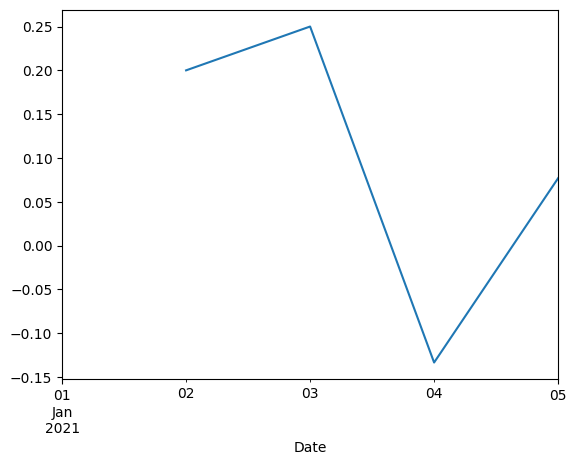

In [65]:
df['Price'].pct_change().plot()

## cov() 
데이터프레임에서 각 `컬럼(또는 Series)`들 간의 `공분산(covariance)`을 계산하는 메서드입니다.  
`공분산`은 두 변수의 `상관관계`를 나타내며, 두 변수가 함께 어떻게 변하는지를 나타내는 통계적 지표입니다.

In [67]:


import pandas as pd

# 예제 데이터 생성
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1]
}

df = pd.DataFrame(data)
df

,A,B
0,1,5
1,2,4
2,3,3
3,4,2
4,5,1


In [68]:
# column간 공분산
df.cov()

,A,B
A,2.5,-2.5
B,-2.5,2.5


## corr() 

데이터프레임에서 각` 컬럼(또는 Series)들 간`의 `상관계수(correlation coefficient)`를 계산하는 메서드입니다.  
상관계수는 두 변수 간의 선형 관계 정도를 나타내는 지표로, `-1`부터 `1`까지의 범위를 가집니다.

***`method`:***
- `'pearson'`: 피어슨 상관계수를 계산합니다 **(기본값)**.
- `'kendall'`: 켄달의 타우 상관계수를 계산합니다.
- `'spearman'`: 스피어맨 순위 상관계수를 계산합니다.


In [70]:
import pandas as pd

# 예제 데이터 생성
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 3, 4, 1],
}

df = pd.DataFrame(data)
df

,A,B,C
0,1,5,2
1,2,4,3
2,3,3,3
3,4,2,4
4,5,1,1


In [71]:
# 'A', 'B', 'C` 컬럼 간의 상관계수 계산
df.corr()

,A,B,C
A,1.000000,-1.000000,-0.138675
B,-1.000000,1.000000,0.138675
C,-0.138675,0.138675,1.000000


In [72]:
# spearman 상관계수
df.corr(method='spearman')


,A,B,C
A,1.000000,-1.000000,-0.051299
B,-1.000000,1.000000,0.051299
C,-0.051299,0.051299,1.000000
